<a href="https://colab.research.google.com/github/pyagoubi/Stuff/blob/main/Weedsmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import math

In [113]:
data = pd.read_excel('/content/drive/MyDrive/upwork3/WeedSmart_v6.xlsx')

df_clean = pd.read_excel('/content/drive/MyDrive/upwork3/WeedSmart_clean.xlsx')

df_clean =df_clean.replace('Commercial rep (e.g. chemical, machinery)', 'Commercial Rep')
df_clean =df_clean.replace('Farm owner', 'Farmer')
df_clean =df_clean.replace('Farm employee', 'Farmer')

In [187]:
def plots( df_clean, col_sum , occ_all, title, gb = 'Occupation'):

  

  summary_count = pd.DataFrame(df_clean[col_sum].groupby(gb).count().sum(), columns = ['Number of entries'])
  sum_table = summary_count.copy()
  sum_table['Percentage']=pd.DataFrame(summary_count['Number of entries']/occ_all).applymap('{:.1%}'.format)
  sum_df=pd.DataFrame(summary_count['Number of entries']/occ_all)


  display(sum_table)

  print('\n\n\n')
  fig, ax = plt.subplots(1,1, figsize = (10,5))
  plt.title(title)
  ax.bar(sum_df.index,sum_df['Number of entries']*100, align = 'center', width = 0.6)
  ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=40, ha='right')
  ax.bar_label(ax.containers[0], label_type='edge', fmt='%.f%%')
  ax.set_ylim(0, 110)
  plt.show()

  print('\n\n\n')
  print('\n\n\n')

  r = math.ceil(len(col_sum)/2)
  cols = col_sum[1:]
  fig, ax = plt.subplots(r,2, figsize=(10,r*4))
  #fig.suptitle('Herbicide resistance testing',fontsize=16)
  row=0
  col=[0,1]*r
  for i, column in enumerate(cols):
      plot_fig = pd.DataFrame(df_clean.loc[:, [gb, column]].groupby(gb)[column].count())
      if (i!=0)&(i%2==0):
          row+=1
      axs = ax[row,col[i]]
      axs.bar(plot_fig.index,plot_fig[column]/occ_all*100)
      axs.set_xticks(axs.get_xticks(), axs.get_xticklabels(), rotation=40, ha='right')
      axs.set_title(column )
      axs.bar_label(axs.containers[0], label_type='edge', fmt='%.0f%%')
      axs.set_ylim(0, 110)
  fig.tight_layout()

# Location

In [114]:
loc_col = [ 'Location','Occupation']
loc_summary = pd.DataFrame(df_clean[['Location', 'Occupation']].groupby('Location').count()).rename(columns = {'Occupation':'Percentage'})
loc_summary['Number of entries'] = loc_summary['Percentage']
#pd.DataFrame(loc_summary['Number of entries']/loc_summary['Number of entries'].sum()).applymap('{:.1%}'.format)
loc_summary['Percentage']=  pd.DataFrame(loc_summary['Percentage']/175).applymap('{:.1%}'.format)
loc_summary

,Percentage,Number of entries
Location,,
NSW Central,7.4%,13
NSW NE/ QLD SE,10.9%,19
NSW NW/ QLD SW,2.9%,5
NSW/ VIC Slopes,13.7%,24
QLD Central/ Northern,1.7%,3
SA Mid North/ Lower Yorke Eyre,19.4%,34
SA VIC Mallee,5.1%,9
SA/ VIC Bordertown. Wimmera,10.3%,18
VIC High Rainfall,5.1%,9


In [115]:
pd.DataFrame(loc_summary['Number of entries']/loc_summary['Number of entries'].sum()).applymap('{:.1%}'.format)

,Number of entries
Location,
NSW Central,7.7%
NSW NE/ QLD SE,11.2%
NSW NW/ QLD SW,3.0%
NSW/ VIC Slopes,14.2%
QLD Central/ Northern,1.8%
SA Mid North/ Lower Yorke Eyre,20.1%
SA VIC Mallee,5.3%
SA/ VIC Bordertown. Wimmera,10.7%
VIC High Rainfall,5.3%


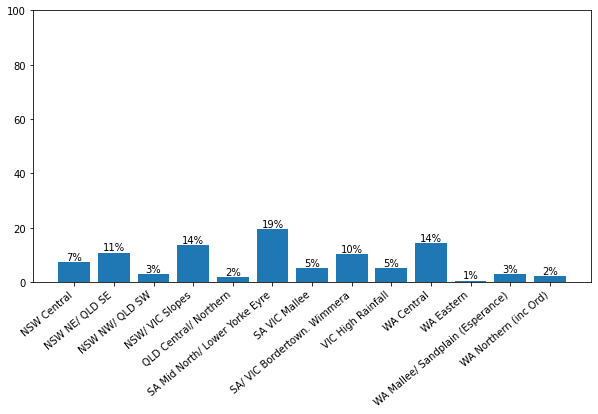

In [116]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
#plt.title('Location')
ax.bar(loc_summary.index,loc_summary['Number of entries']/175*100)
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=40, ha='right')
ax.bar_label(ax.containers[0], label_type='edge', fmt='%.0f%%')
ax.set_ylim(0, 100)
#ax.set_ylabel('%')
plt.show()

<Axes: xlabel='Location'>

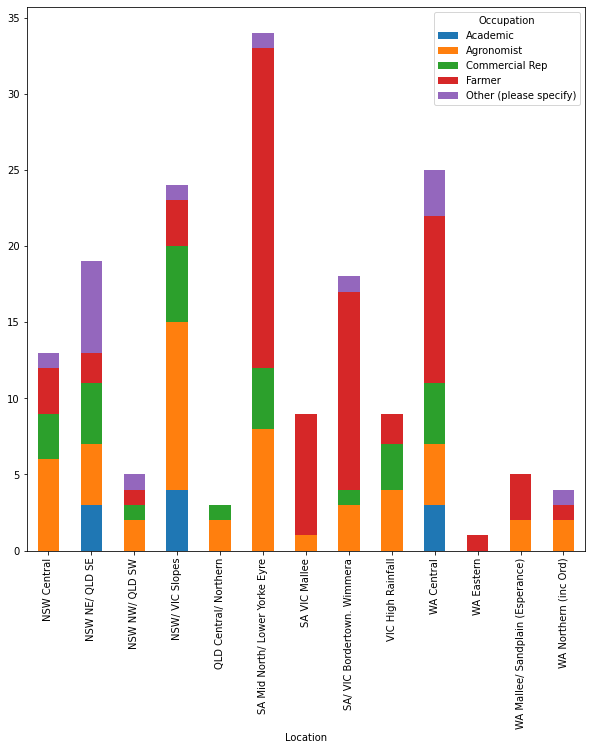

In [117]:
df_clean[loc_col].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(10,10))

In [118]:
loc= df_clean[loc_col].value_counts().unstack().fillna(0)

In [119]:
loc=loc.reset_index()
loc.columns

Index(['Location', 'Academic', 'Agronomist', 'Commercial Rep', 'Farmer',
       'Other (please specify)'],
      dtype='object', name='Occupation')

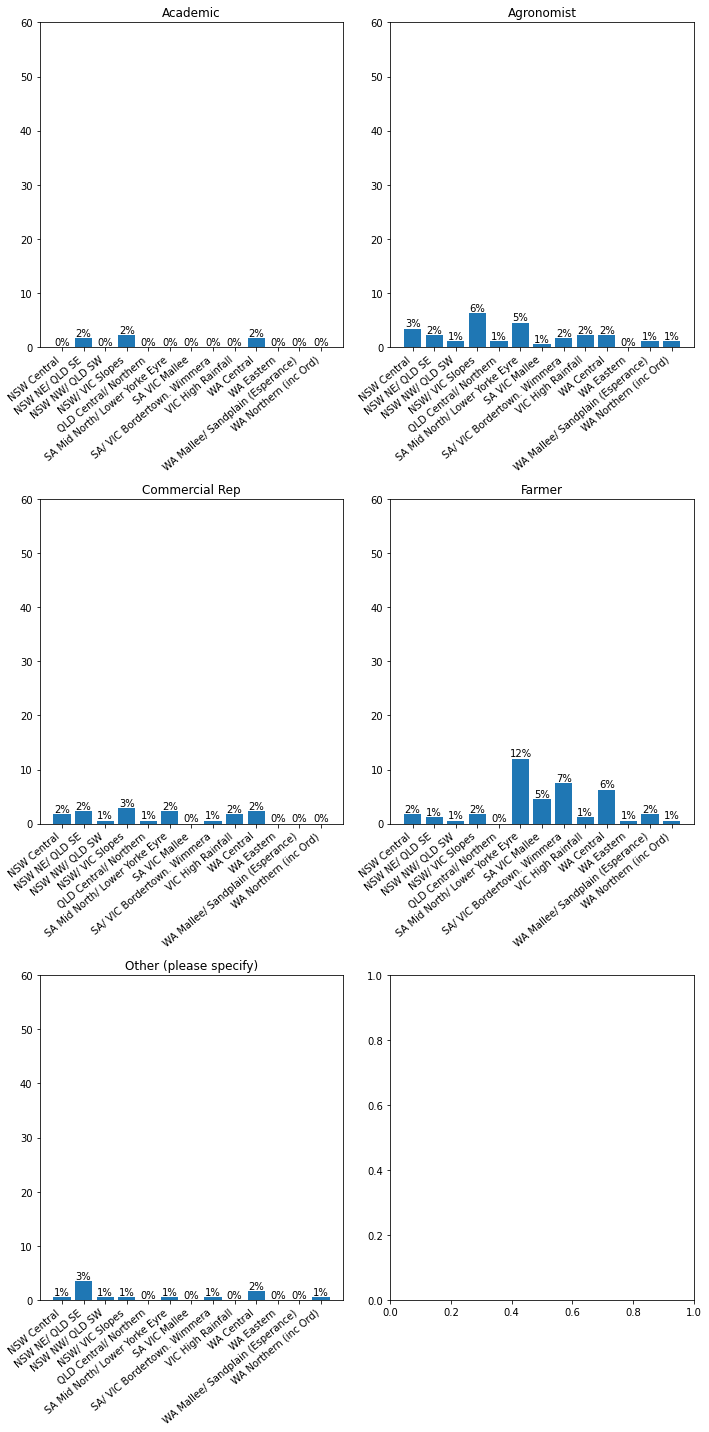

In [120]:
cols = loc.columns[1:]
fig, ax = plt.subplots(3,2, figsize=(10,20))
#fig.suptitle('Herbicide resistance testing',fontsize=16)
row=0
col=[0,1]*3
for i, column in enumerate(cols):
    plot_fig = pd.DataFrame(loc.loc[:, ['Location', column]].groupby('Location')[column].sum())
    if (i!=0)&(i%2==0):
        row+=1
    axs = ax[row,col[i]]
    axs.bar(plot_fig.index,plot_fig[column]/175*100)
    axs.set_xticks(axs.get_xticks(), axs.get_xticklabels(), rotation=40, ha='right')
    axs.set_title(column )
    axs.bar_label(axs.containers[0], label_type='edge', fmt='%.0f%%')
    axs.set_ylim(0, 60)
fig.tight_layout()

# Occupation

In [121]:
pd.DataFrame(df_clean['Occupation'].value_counts()/df_clean['Occupation'].value_counts().sum()).applymap('{:.1%}'.format)

,Occupation
Farmer,39.9%
Agronomist,26.4%
Commercial Rep,15.0%
Other (please specify),11.9%
Academic,6.7%


In [122]:
occ= pd.DataFrame(df_clean['Occupation'].value_counts()).rename(columns={'Occupation':'Number of entries'})



In [123]:
occ = occ.reset_index()
occ =occ.sort_values('index')

In [124]:
occ_all =df_clean['Occupation'].count()

In [125]:
occ

,index,Number of entries
4,Academic,13
1,Agronomist,51
2,Commercial Rep,29
0,Farmer,77
3,Other (please specify),23


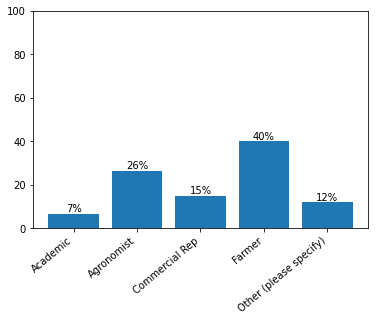

In [126]:


fig, ax = plt.subplots(1,1)
#plt.title('Herbicide resistance testing')
ax.bar(occ['index'],occ['Number of entries']/occ['Number of entries'].sum()*100)
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=40, ha='right')
ax.bar_label(ax.containers[0], label_type='edge', fmt='%.0f%%')
ax.set_ylim(0, 100)
plt.show()

# Crops

## Data

In [ ]:
crop_cols = ['Occupation', 
             'Green Manured',
             'Brown Manured','Wheat','Barley',
             'Canola','Oats','Lentils','Chickpeas',
             'Lupins','Peas','Faba beans','Mung beans',
             'Vetch','Oaten hay','Cotton','Sorghum','Millet',
             'Sheep','Cattle','Crops: Other']

col_sum = crop_cols
occ_all =73



# Area

In [146]:
df_clean =df_clean.rename(columns = {'On average, how much area (in hectares) does your farm business crop each year?': 'Area'})
df_clean['Area'].fillna(0, inplace = True)

In [147]:
pd.DataFrame(df_clean[df_clean['Area']>0].groupby('Occupation')['Area'].mean()).round(decimals =2)

,Area
Occupation,
Farmer,"2,160.70"


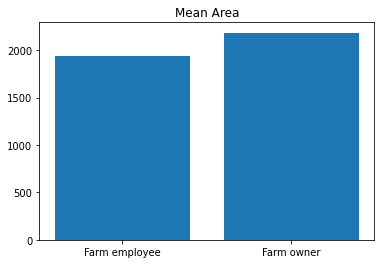

In [41]:
area_df = pd.DataFrame(data[data['Area']>0].groupby('Occupation')['Area'].mean())
area_df
plt.bar(area_df.index, area_df['Area'])
plt.title('Mean Area')
plt.show()

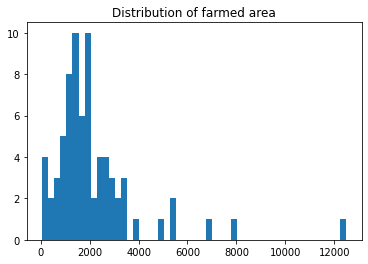

In [42]:
plt.title('Distribution of farmed area')
plt.hist(data.loc[data['Area']>0, 'Area'], bins =50)
plt.show()

# Rotate Crops

In [ ]:
rc_cols = ['Occupation', 
             'Single Break','Double Break','Fallow phase','Pasture phase','RC: Not practiced','RC: Other']


col_sum = rc_cols

occ_all =101



# Increase crop competition on

In [ ]:
df_clean = df_clean.rename(columns = {'Sow early to increase crop competitiveness with weeds': 'Sow early', 
                          'Consider the competitive ability of varieties when selecting varieties':'Consider the competitive ability' })


inc_cols = ['Occupation', 'Narrow row spacing (25 cm or less)','Paired rows','Higher sowing rate to increase crop competition with weeds','East-west sowing','Sow early',
'Consider the competitive ability',
'Incr.: Not practiced','Increase Comp: Other ']

col_sum = inc_cols

occ_all =101



# Soil Amelioration

In [ ]:
soil_cols = ['Occupation', 
             'Deep ripping to 40 cm',
           'Deep ripping to 60 cm','Delving',
           'Rotary spading','Mouldboard plough',
           'Plozza plough','Incorporating lime',
           'Incorporating clay','Applying gypsum for sodicity',
           'Not practiced','Soil: Other ']


col_sum = soil_cols


occ_all =97



# Mix and rotate herbicides

In [160]:


df_mix=df_clean[['Occupation', 'Mix and rotate herbicides(%)']]
df_mix = df_mix.fillna(0)
df_mix['Mix and rotate herbicides(%)'] = df_mix['Mix and rotate herbicides(%)'] *100

pd.options.display.float_format = '{:0.2%}'.format
df_mix.groupby('Occupation').mean()

,Mix and rotate herbicides(%)
Occupation,
Academic,0.00%
Agronomist,4039.22%
Commercial Rep,0.00%
Farmer,4363.64%
Other (please specify),0.00%


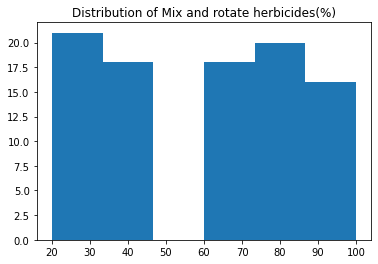

In [51]:
plt.title('Distribution of Mix and rotate herbicides(%)')
plt.hist(df_mix.loc[df_mix['Mix and rotate herbicides(%)']>0, 'Mix and rotate herbicides(%)'], bins =6)
plt.show()

# Double knock to preserve glyphosate

In [ ]:
df_clean = df_clean.rename(columns = {'Double paraquat: paraquat followed by paraquat': 'Double paraquat: P. followed by P.', 
                          'Double paraquat: paraquat followed by paraquat + group 14 (group G)':'Double paraquat: P. followed by P+G14',
                          'Double knock: herbicide x 2, e.g. glyphosate followed by paraquat':'Double knock: hericide x 2' })





dknock_col = ['Occupation', 
              'Double paraquat: P. followed by P.','Double paraquat: P. followed by P+G14',
              'Double knock: hericide x 2',
              'Double knock: herbicide + cultivation',
                'Double knock: herbicide + grazing','Double: Not practiced','Double: Other']

col_sum = dknock_col

occ_all =101



# Stop weed seed set

In [ ]:
stop_col = ['Occupation','Crop top canola, pulses, wheat or feed barley',
            'Cut hay or silage','Brown manure or long fallow',
            'Spraytop pasture','Windrow (swath)',
            'Optical spot spraying',
            'Not practiced','Stop weed seed set  Other']

col_sum = stop_col


occ_all =101






# Herbicide resistance testing 

,Number of entries,Percentage
Quick-test (during the season),23,23.5%
Seed testing (at the end of the season),54,55.1%
Not practiced,15,15.3%
Herbicide resistance testing Other,2,2.0%


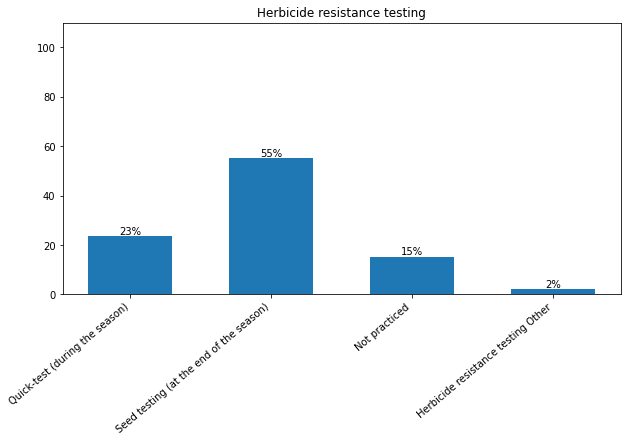

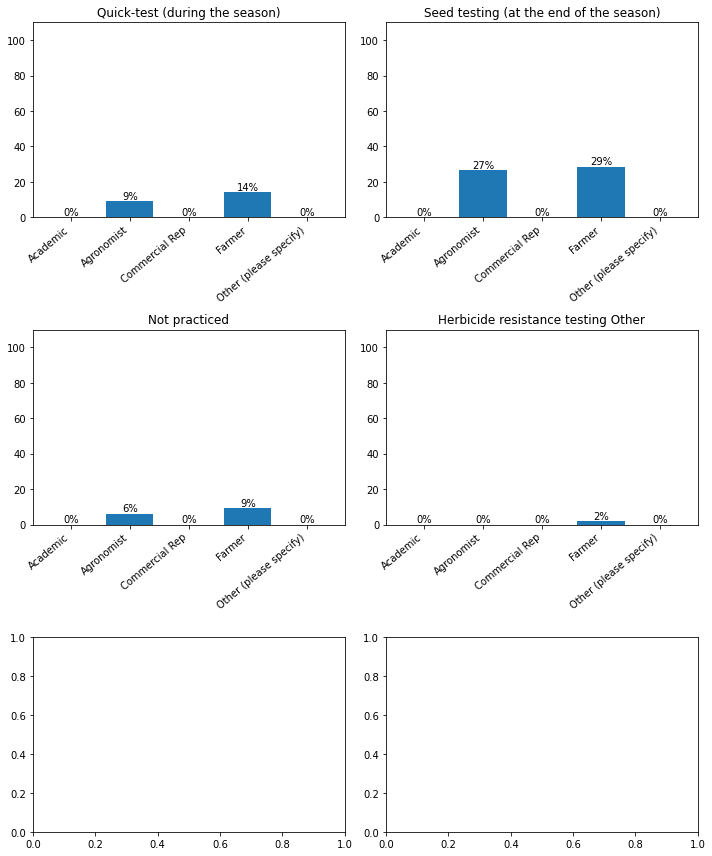

In [166]:
htest_cols = ['Occupation', 'Quick-test (during the season)',
'Seed testing (at the end of the season)',
'Not practiced','Herbicide resistance testing Other']


#col_sum = htest_cols



plots(df_clean = df_clean, col_sum = htest_cols, occ_all =98, title ='Herbicide resistance testing' )

# Implement harvest weed seed control

In [ ]:
wsc_cols = ['Occupation', 'Narrow windrow burning',
              'Chaff cart','Bale direct',
              'Weed seed impact mill',
              'Chaff tramlining (on wheel tracks)',
              'Chaff lining (in centre of harvester)',
              'Implement harvest weed seed control Not practiced',
              'Implement harvest weed seed control  Other ',]


plots(df_clean = df_clean, col_sum = wsc_cols, occ_all =99, title ='Implement harvest weed seed control' )

# Engagement with Weedsmart

In [ ]:
eng = ['Occupation','Email newsletter',
 ' Website',
 'Facebook',
 ' Twitter',
 'Podcasts',
 'Webinars',
 'Online courses',
 'Face-to-face workshops',
 'Field days',
 'WeedSmart Week',
 'Conferences']


plots(df_clean = df_clean, col_sum = eng, occ_all =141, title ='Engagement with Weedsmart' )




# Relevance of Information

(0.0, 12.0)

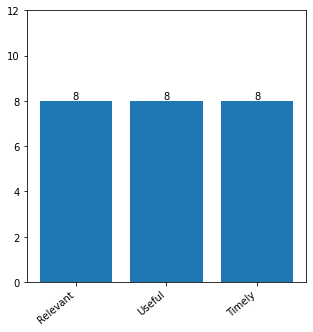

In [57]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

cols = ['Relevant', 'Useful', 'Timely']




ax.bar(cols,np.round(df_clean[cols].mean(), decimals =0))
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=40, ha='right')
#axs.set_title(column )
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylim(0, 12)

In [58]:
df_clean[cols].mean()

Relevant   8.39
Useful     8.29
Timely     8.11
dtype: float64

In [ ]:

cols = ['Relevant', 'Useful', 'Timely']
fig, ax = plt.subplots(2,2, figsize=(10,10))
fig.suptitle('Relevance of Information',fontsize=16)
row=0
col=[0,1]*2
for i, column in enumerate(cols):
    plot_fig = pd.DataFrame(df_clean.loc[:, ['Occupation', column]].groupby('Occupation')[column].mean())
    if (i!=0)&(i%2==0):
        row+=1
    axs = ax[row,col[i]]
    axs.bar(plot_fig.index,np.round(plot_fig[column], decimals =0))
    axs.set_xticks(axs.get_xticks(), axs.get_xticklabels(), rotation=40, ha='right')
    axs.set_title(column )
    axs.bar_label(axs.containers[0], label_type='edge')
    axs.set_ylim(0, 12)
fig.tight_layout(pad = 5)

# Gained from Weedsmart

In [ ]:
df_clean = df_clean.rename(columns={'What have you gained from engaging with WeedSmart? Select all that apply.  Other (please specify)':'Gained: Other'})



gain = ['Occupation', ' Practical crop management strategies',
 'Data behind integrated weed management strategies.',
 'Information about on-farm practices',
 'Improved decision making',
 'Updated Information',
 'Network with industry professionals',
 'Information on weed biology and identification.',
 'No benefit',
 'Gained: Other']


plots(df_clean = df_clean, col_sum = gain, occ_all =139, title ='Gained from Weedsmart' )

# How likely is it that you would recommend WeedSmart to a friend or colleague?

,Would recommend
Occupation,
Academic,8.67
Agronomist,8.83
Commercial Rep,8.17
Farmer,8.53
Other (please specify),9.05


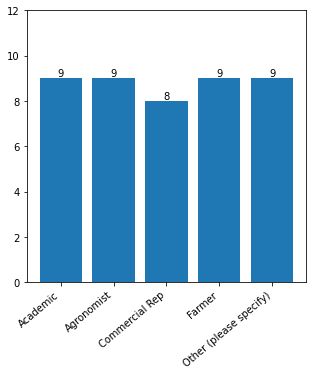

In [179]:
df_clean['Would recommend'].fillna(0, inplace = True)

rec_df = pd.DataFrame(df_clean[df_clean['Would recommend']>0].groupby('Occupation')['Would recommend'].mean())
#rec_df['Would recommend'].str.rstrip("%").astype(float)/100
display(rec_df)
print('\n\n\n')

# plt.bar(rec_df.index, rec_df['Would recommend'])
# plt.title('Mean Recommendation Score')
# plt.xticks(rotation=40, ha = 'right')
# plt.show()

fig, ax = plt.subplots(1,1, figsize=(5,5))

ax.bar(rec_df.index,np.round(rec_df['Would recommend'], decimals = 0))
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=40, ha='right')
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylim(0, 12)
plt.show()

# Impact to your work if WeedSmart no longer existed?

In [ ]:
import numpy as np
np.round(imp_summary, decimals = 2)

,Impact to your work if WeedSmart no longer existed?
Occupation,
Academic,5.83
Agronomist,6.37
"Commercial rep (e.g. chemical, machinery)",6.30
Farm employee,6.17
Farm owner,6.35
Other (please specify),5.89


,Impact to your work if WeedSmart no longer existed?
Occupation,
Academic,5.83
Agronomist,6.37
Commercial Rep,6.30
Farmer,6.33
Other (please specify),5.89


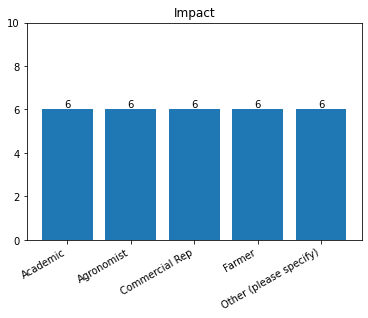

In [183]:
imp = ['Occupation', 'Impact to your work if WeedSmart no longer existed?']

imp_summary = pd.DataFrame(df_clean[imp].groupby('Occupation').mean()) ####
#imp['Occupation'].str.rstrip("%").astype(float)/100
display(imp_summary) ###
pd.options.display.float_format = '{:,.2f}'.format

imp_summary = np.round(imp_summary, decimals = 2)

print('\n\n\n')
fig, ax = plt.subplots(1,1)
plt.title('Impact') ###
ax.bar(imp_summary.index,imp_summary['Impact to your work if WeedSmart no longer existed?'].round(decimals=0))  ####
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
#ax.xaxis.set_major_formatter("{x:.0f}")
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylim(0, 10)


plt.show()

# Regional Analysis

In [184]:
df_clean.replace({'Location' : {'QLD Central/ Northern' : 'Northern', 'NSW NE/ QLD SE' : 'Northern', 'NSW NW/ QLD SW' : 'Northern'}}, inplace = True)
df_clean.replace({'Location' : {'SA Mid North/ Lower Yorke Eyre' : 'Southern', 'SA/ VIC Bordertown. Wimmera' : 'Southern', 'SA VIC Mallee' : 'Southern',
                                'VIC High Rainfall': 'Southern', 'NSW Central': 'Southern','NSW/ VIC Slopes':'Southern' }}, inplace = True)
df_clean.replace({'Location' : {'WA Northern (inc Ord)' : 'Western', 'WA Central' : 'Western', 'WA Eastern' : 'Western',
                                'WA Mallee/ Sandplain (Esperance)': 'Western'}}, inplace = True)

In [176]:
loc_col = [ 'Location','Occupation']
loc_summary = pd.DataFrame(df_clean[['Location', 'Occupation']].groupby('Location').count()).rename(columns = {'Occupation':'Number of entries'})
pd.DataFrame(loc_summary['Number of entries']/loc_summary['Number of entries'].sum()).applymap('{:.1%}'.format)

,Number of entries
Location,
Northern,16.0%
Southern,63.3%
Western,20.7%


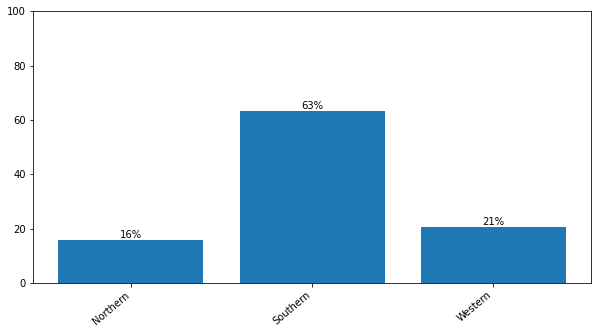

In [177]:
fig, ax = plt.subplots(1,1, figsize = (10,5))
#plt.title('Location')
ax.bar(loc_summary.index,loc_summary['Number of entries']/loc_summary['Number of entries'].sum()*100)
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=40, ha='right')
ax.bar_label(ax.containers[0], label_type='edge', fmt='%.0f%%')
ax.set_ylim(0, 100)
#ax.set_ylabel('%')
plt.show()

In [ ]:
Q16, 17, 19 and 21 by t

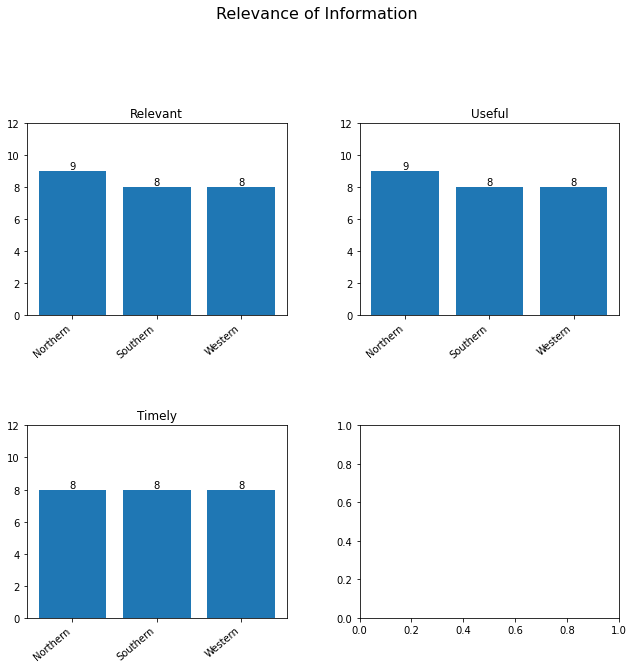

In [185]:
cols = ['Relevant', 'Useful', 'Timely']
fig, ax = plt.subplots(2,2, figsize=(10,10))
fig.suptitle('Relevance of Information',fontsize=16)
row=0
col=[0,1]*2
for i, column in enumerate(cols):
    plot_fig = pd.DataFrame(df_clean.loc[:, ['Location', column]].groupby('Location')[column].mean())
    if (i!=0)&(i%2==0):
        row+=1
    axs = ax[row,col[i]]
    axs.bar(plot_fig.index,np.round(plot_fig[column], decimals =0))
    axs.set_xticks(axs.get_xticks(), axs.get_xticklabels(), rotation=40, ha='right')
    axs.set_title(column )
    axs.bar_label(axs.containers[0], label_type='edge')
    axs.set_ylim(0, 12)
fig.tight_layout(pad = 5)

In [ ]:
gain = ['Location', ' Practical crop management strategies',
 'Data behind integrated weed management strategies.',
 'Information about on-farm practices',
 'Improved decision making',
 'Updated Information',
 'Network with industry professionals',
 'Information on weed biology and identification.',
 'No benefit',
 'Gained: Other']


col_sum = gain

plots(df_clean = df_clean, col_sum = gain, occ_all =139, title ='Gain', gb ='Location' )


# summary_count = pd.DataFrame(df_clean[col_sum].groupby('Location').count().sum(), columns = ['Number of entries'])
# sum_table=pd.DataFrame(summary_count['Number of entries']/summary_count['Number of entries'].sum()).applymap('{:.1%}'.format)
# sum_df=pd.DataFrame(summary_count['Number of entries']/summary_count['Number of entries'].sum())


# display(sum_table)

# print('\n\n\n')
# fig, ax = plt.subplots(1,1, figsize = (10,5))
# #plt.title('Herbicide resistance testing')
# ax.bar(sum_df.index,sum_df['Number of entries']*100, align = 'center', width = 0.6)
# ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=40, ha='right')
# ax.bar_label(ax.containers[0], label_type='edge', fmt='%.1f%%')
# ax.set_ylim(0, 100)
# plt.show()

# print('\n\n\n')
# print('\n\n\n')

# r = math.ceil(len(col_sum)/2)

# cols = col_sum[1:]
# fig, ax = plt.subplots(r,2, figsize=(10,r*4))
# #fig.suptitle('Herbicide resistance testing',fontsize=16)
# row=0
# col=[0,1]*r
# for i, column in enumerate(cols):
#     plot_fig = pd.DataFrame(df_clean.loc[:, ['Location', column]].groupby('Location')[column].count())
#     if (i!=0)&(i%2==0):
#         row+=1
#     axs = ax[row,col[i]]
#     axs.bar(plot_fig.index,plot_fig[column]/occ_all*100)
#     axs.set_xticks(axs.get_xticks(), axs.get_xticklabels(), rotation=40, ha='right')
#     axs.set_title(column )
#     axs.bar_label(axs.containers[0], label_type='edge', fmt='%.1f%%')
#     axs.set_ylim(0, 100)
# fig.tight_layout()

,Would recommend
Location,
Northern,9.00
Southern,8.60
Western,8.10


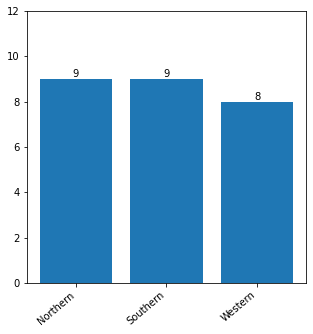

In [190]:
df_clean['Would recommend'].fillna(0, inplace = True)

rec_df = pd.DataFrame(np.round(df_clean[df_clean['Would recommend']>0].groupby('Location')['Would recommend'].mean(), decimals = 1))

display(rec_df)
print('\n\n\n')

# plt.bar(rec_df.index, rec_df['Would recommend'])
# plt.title('Mean Recommendation Score')
# plt.xticks(rotation=40, ha = 'right')
# plt.show()

fig, ax = plt.subplots(1,1, figsize=(5,5))

ax.bar(rec_df.index,np.round(rec_df['Would recommend'], decimals = 0))
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=40, ha='right')
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylim(0, 12)
plt.show()

,Impact to your work if WeedSmart no longer existed?
Location,
Northern,6.5
Southern,6.3
Western,5.8


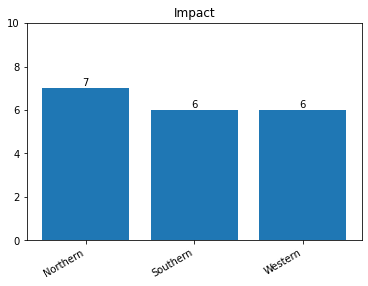

In [191]:
imp = ['Location', 'Impact to your work if WeedSmart no longer existed?']

pd.options.display.float_format = '{:,.1f}'.format
imp_summary = pd.DataFrame(df_clean[imp].groupby('Location').mean()) ####
display(imp_summary) ###


imp_summary = np.round(imp_summary, decimals = 2)

print('\n\n\n')
fig, ax = plt.subplots(1,1)
plt.title('Impact') ###
ax.bar(imp_summary.index,imp_summary['Impact to your work if WeedSmart no longer existed?'].round(decimals=0))  ####
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=30, ha='right')
#ax.xaxis.set_major_formatter("{x:.2f}")
ax.bar_label(ax.containers[0], label_type='edge')
ax.set_ylim(0, 10)


plt.show()

In [ ]:
%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/upwork3/Weedsmart.ipynb'